# Tuning Ensemble Scores through Logarithmic PCA

In [1]:
import mixician as mc

In [2]:
samples = mc.create_mix_rank_test_samples(
    rows = 500000,
    num_page_types = 5,
    num_features= 8,
)

23:41:43 - INFO - Generating mixed rank test samples for 500000 rows...


In [3]:
samples

,request_id,item_id,category,pxtr_1,pxtr_2,pxtr_3,pxtr_4,pxtr_5,pxtr_6,pxtr_7,pxtr_8
0,1,351172,page_type_2,0.002586,0.196618,0.088033,0.007568,0.004118,0.002663,0.001190,0.231547
1,1,490737,page_type_2,0.009644,0.761513,0.086580,0.052613,0.004747,0.001985,0.001547,0.235602
2,1,262730,page_type_5,0.007814,0.118631,0.086328,0.074174,0.003686,0.002311,0.001287,0.250460
3,1,210445,page_type_2,0.006161,0.973821,0.086399,0.045841,0.005239,0.002625,0.001371,0.142255
4,1,207358,page_type_1,0.012267,0.313533,0.087275,0.017787,0.001440,0.004116,0.001295,0.186760
...,...,...,...,...,...,...,...,...,...,...,...
499995,5000,359517,page_type_2,0.009637,0.398130,0.087719,0.028973,0.002808,0.002550,0.001499,0.204594
499996,5000,173729,page_type_2,0.010553,0.073969,0.087006,0.024161,0.001242,0.002833,0.001463,0.233628
499997,5000,312489,page_type_5,0.006250,0.128698,0.091169,0.056994,0.000853,0.002452,0.001388,0.192867
499998,5000,249994,page_type_1,0.013159,0.554174,0.086290,0.049323,0.002181,0.003174,0.001553,0.194059


In [4]:
config = mc.load_config(
    file_path="config_case_01.yml",
)

23:41:46 - INFO - Loading configuration ...


In [5]:
dv = mc.DistributionViewer(
    dataframe=samples,
    score_columns=config['LogarithmPCACalculator']['score_columns'],
)

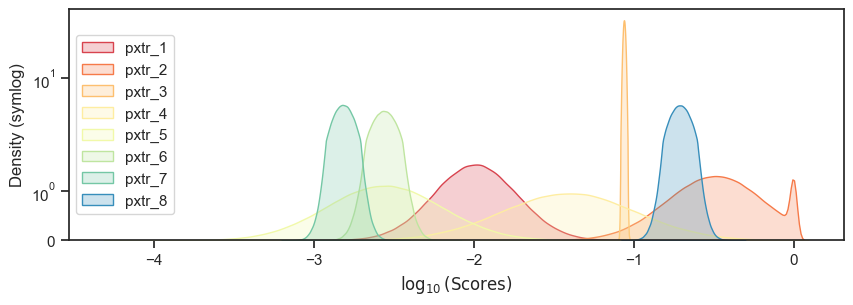

In [6]:
dv.plot_logarithm_distributions()

In [7]:
import numpy as np
np.log10(10)

1.0

In [8]:
lpc = mc.LogarithmPCACalculator(
    dataframe=samples,
    config=config['LogarithmPCACalculator'],
)

23:41:51 - INFO - Preprocessing data for PCA calculation...
23:41:51 - INFO - Applying logarithm transformation to data...


In [9]:
lpc.calculate()

23:41:51 - INFO - Performing weighted logarithm PCA on the normalized data...


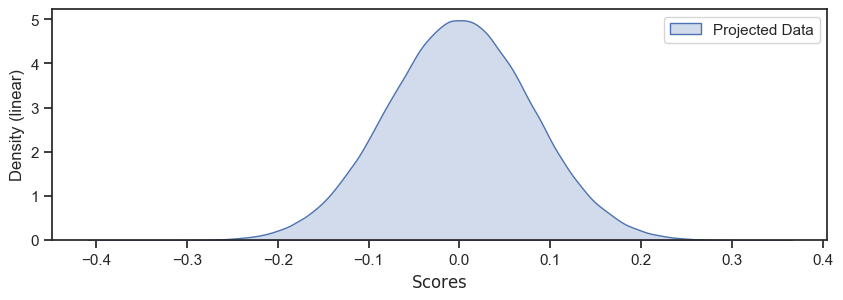

In [10]:
dv.plot_array_distribution(
    scores=lpc.projected_data,
    legend="Projected Data",
)